In [ ]:
import os

In [ ]:
os.chdir("C:/Users/induk/Desktop/dataset")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    #for plotting of graphs
%matplotlib inline
import seaborn as sb
import scipy    #used fpr data visualization
from scipy.stats.stats import pearsonr
sample=pd.read_excel("Sample Auctions_Data_Set_1.xlsx")

In [5]:
sample

,RecID,AuctionCurrency,AuctionDate,AuctionID,Indicator-Day-Afternoon,Auction Title,Auction House,AuctionLocation,lot LotNo,artwork ID,Artwork Title,ArtworkCategory,Artist_Full_Name,lot_EstimateHigh,lot_EstimateLow,SalePrice,LotStatus
0,2547,GBP,2018-03-07,22,Contemporary Art Evening Auction,Contemporary Art Evening Auction,Sotheby's,London,1,6998013,Untitled,PAINTINGS,Christopher Wool,600000,400000,729000.0,Sold
1,2548,GBP,2018-03-07,22,Contemporary Art Evening Auction,Contemporary Art Evening Auction,Sotheby's,London,10,6998014,Angel Of The North,SCULPTURE,Antony Gormley,2000000,1500000,2860600.0,Sold
2,2549,GBP,2018-03-07,22,Contemporary Art Evening Auction,Contemporary Art Evening Auction,Sotheby's,London,11,6998015,Some People (Welcome Series),PAINTINGS,Hurvin Anderson,800000,600000,1029000.0,Sold
3,2550,GBP,2018-03-07,22,Contemporary Art Evening Auction,Contemporary Art Evening Auction,Sotheby's,London,12,6998016,The Architect's Home In The Ravine,PAINTINGS,Peter Doig,18000000,14000000,14376400.0,Sold
4,2551,GBP,2018-03-07,22,Contemporary Art Evening Auction,Contemporary Art Evening Auction,Sotheby's,London,13,6998017,A Swan Comforting A Snake,PAINTINGS,Cecily Brown,1500000,1000000,1209000.0,Sold
5,2552,GBP,2018-03-07,22,Contemporary Art Evening Auction,Contemporary Art Evening Auction,Sotheby's,London,14,6998018,Eifrau Die Man Nicht Schubladieren Kann (Egg L...,PAINTINGS,Martin Kippenberger,3000000,2000000,2169000.0,Sold
6,2553,GBP,2018-03-07,22,Contemporary Art Evening Auction,Contemporary Art Evening Auction,Sotheby's,London,15,6998019,Memory Ware Flat #29,PAINTINGS,Mike Kelley,2000000,1500000,1689000.0,Sold
7,2554,GBP,2018-03-07,22,Contemporary Art Evening Auction,Contemporary Art Evening Auction,Sotheby's,London,16,6998020,Yellow Cell With Triple Conduit,PAINTINGS,Peter Halley,350000,250000,513000.0,Sold
8,2555,GBP,2018-03-07,22,Contemporary Art Evening Auction,Contemporary Art Evening Auction,Sotheby's,London,17,6998021,Untitled,SCULPTURE,Richard Prince,1500000,1000000,2049000.0,Sold
9,2556,GBP,2018-03-07,22,Contemporary Art Evening Auction,Contemporary Art Evening Auction,Sotheby's,London,18,6998022,Nov. 8,PAINTINGS,On Kawara,800000,600000,789000.0,Sold


In [6]:
sample.apply(lambda x:sum(x.isnull()),axis=0)

RecID                       0
AuctionCurrency             0
AuctionDate                 0
AuctionID                   0
Indicator-Day-Afternoon     0
Auction Title               0
Auction House               0
AuctionLocation             0
lot LotNo                   0
artwork ID                  0
Artwork Title               0
ArtworkCategory             0
Artist_Full_Name            0
lot_EstimateHigh            0
lot_EstimateLow             0
SalePrice                  12
LotStatus                   0
dtype: int64

In [7]:
sample.describe()

,RecID,AuctionID,lot LotNo,artwork ID,lot_EstimateHigh,lot_EstimateLow,SalePrice
count,111.000000,111.000000,111.000000,1.110000e+02,1.110000e+02,1.110000e+02,9.900000e+01
mean,2602.000000,22.450450,28.522523,6.998403e+06,1.728018e+06,1.234955e+06,2.091090e+06
std,32.186954,0.499795,16.556705,3.994203e+02,2.872545e+06,2.072786e+06,4.856774e+06
min,2547.000000,22.000000,1.000000,6.998013e+06,9.000000e+04,7.000000e+04,9.300000e+04
25%,2574.500000,22.000000,14.500000,6.998040e+06,4.500000e+05,3.000000e+05,4.290000e+05
50%,2602.000000,22.000000,28.000000,6.998068e+06,7.000000e+05,5.000000e+05,7.290000e+05
75%,2629.500000,23.000000,42.000000,6.998838e+06,1.800000e+06,1.300000e+06,1.779000e+06
max,2657.000000,23.000000,61.000000,6.998866e+06,1.800000e+07,1.400000e+07,4.185900e+07


In [8]:
sample['lot_EstimateHigh'].max()

18000000

In [9]:
sample['ArtworkCategory'].value_counts()

PAINTINGS         74
SCULPTURE         22
WORKS ON PAPER     7
PHOTOGRAPHS        6
PRINTS             1
TEXTILES           1
Name: ArtworkCategory, dtype: int64

In [10]:
sample['AuctionCurrency'].value_counts()

GBP    111
Name: AuctionCurrency, dtype: int64

In [38]:
dis=sample.groupby(['ArtworkCategory','SalePrice'])

In [12]:
sample.groupby('ArtworkCategory').SalePrice.max()

ArtworkCategory
PAINTINGS         41859000.0
PHOTOGRAPHS        1029000.0
PRINTS             2349000.0
SCULPTURE         14859000.0
TEXTILES            381000.0
WORKS ON PAPER     1029000.0
Name: SalePrice, dtype: float64

In [13]:
sample.groupby

<bound method NDFrame.groupby of      RecID AuctionCurrency AuctionDate  AuctionID  \
0     2547             GBP  2018-03-07         22   
1     2548             GBP  2018-03-07         22   
2     2549             GBP  2018-03-07         22   
3     2550             GBP  2018-03-07         22   
4     2551             GBP  2018-03-07         22   
5     2552             GBP  2018-03-07         22   
6     2553             GBP  2018-03-07         22   
7     2554             GBP  2018-03-07         22   
8     2555             GBP  2018-03-07         22   
9     2556             GBP  2018-03-07         22   
10    2557             GBP  2018-03-07         22   
11    2558             GBP  2018-03-07         22   
12    2559             GBP  2018-03-07         22   
13    2560             GBP  2018-03-07         22   
14    2561             GBP  2018-03-07         22   
15    2562             GBP  2018-03-07         22   
16    2563             GBP  2018-03-07         22   
17    2564   

In [14]:
p1=sample['lot_EstimateLow'].mean()
p2=sample['lot_EstimateLow'].mode()
p3=sample['lot_EstimateLow'].median()
print(p1,p2,p3)

1234954.954954955 0    250000
dtype: int64 500000.0


In [15]:
new=pd.DataFrame([sample.ArtworkCategory,sample.lot_EstimateHigh,sample.lot_EstimateLow,sample.SalePrice,sample.LotStatus])

In [16]:
new

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
ArtworkCategory,PAINTINGS,SCULPTURE,PAINTINGS,PAINTINGS,PAINTINGS,PAINTINGS,PAINTINGS,PAINTINGS,SCULPTURE,PAINTINGS,...,PAINTINGS,SCULPTURE,WORKS ON PAPER,PAINTINGS,PAINTINGS,PAINTINGS,PAINTINGS,SCULPTURE,PAINTINGS,PAINTINGS
lot_EstimateHigh,600000,2000000,800000,18000000,1500000,3000000,2000000,350000,1500000,800000,...,850000,250000,350000,350000,700000,500000,500000,700000,700000,600000
lot_EstimateLow,400000,1500000,600000,14000000,1000000,2000000,1500000,250000,1000000,600000,...,650000,180000,250000,250000,500000,300000,300000,500000,500000,400000
SalePrice,729000,2.8606e+06,1.029e+06,1.43764e+07,1.209e+06,2.169e+06,1.689e+06,513000,2.049e+06,789000,...,669000,321000,249000,441000,NaN,381000,249000,585000,609000,513000
LotStatus,Sold,Sold,Sold,Sold,Sold,Sold,Sold,Sold,Sold,Sold,...,Sold,Sold,Sold,Sold,Unsold,Sold,Sold,Sold,Sold,Sold


In [17]:
sample2=new.transpose()

In [18]:
sample2

,ArtworkCategory,lot_EstimateHigh,lot_EstimateLow,SalePrice,LotStatus
0,PAINTINGS,600000,400000,729000,Sold
1,SCULPTURE,2000000,1500000,2.8606e+06,Sold
2,PAINTINGS,800000,600000,1.029e+06,Sold
3,PAINTINGS,18000000,14000000,1.43764e+07,Sold
4,PAINTINGS,1500000,1000000,1.209e+06,Sold
5,PAINTINGS,3000000,2000000,2.169e+06,Sold
6,PAINTINGS,2000000,1500000,1.689e+06,Sold
7,PAINTINGS,350000,250000,513000,Sold
8,SCULPTURE,1500000,1000000,2.049e+06,Sold
9,PAINTINGS,800000,600000,789000,Sold


In [19]:
sample.groupby('ArtworkCategory').agg(['mean','median','max'])

RecID                AuctionID             lot LotNo  \
                        mean  median   max       mean median max       mean   
ArtworkCategory                                                               
PAINTINGS        2601.918919  2601.5  2657  22.445946   22.0  23  27.229730   
PHOTOGRAPHS      2605.000000  2607.0  2632  22.500000   22.5  23  30.666667   
PRINTS           2595.000000  2595.0  2595  22.000000   22.0  22  53.000000   
SCULPTURE        2592.727273  2580.5  2655  22.363636   22.0  23  28.409091   
TEXTILES         2599.000000  2599.0  2599  22.000000   22.0  22  57.000000   
WORKS ON PAPER   2630.857143  2636.0  2650  22.857143   23.0  23  33.142857   

                              artwork ID  ...          lot_EstimateHigh  \
                median max          mean  ...      max             mean   
ArtworkCategory                           ...                             
PAINTINGS           26  59  6.998399e+06  ...  6998866     2.113378e+06   
PHOTOGRAPHS         35  61  6.998442e+06  ...  6998841     4.166667e+05   
PRINTS              53  53  6.998061e+06  ...  6998061     1.500000e+06   
SCULPTURE           31  60  6.998329e+06  ...  6998864     1.241818e+06   
TEXTILES            57  57  6.998065e+06  ...  6998065     3.500000e+05   
WORKS ON PAPER      30  58  6.998734e+06  ...  6998859     5.357143e+05   

                                   lot_EstimateLow                     \
                  median       max            mean   median       max   
ArtworkCategory                                                         
PAINTINGS         825000  18000000    1.516486e+06   625000  14000000   
PHOTOGRAPHS       300000    900000    2.916667e+05   200000    700000   
PRINTS           1500000   1500000    1.000000e+06  1000000   1000000   
SCULPTURE         600000   7000000    8.754545e+05   400000   5000000   
TEXTILES          350000    350000    2.500000e+05   250000    250000   
WORKS ON PAPER    450000   1200000    3.714286e+05   350000    800000   

                    SalePrice                         
                         mean     median         max  
ArtworkCategory                                       
PAINTINGS        2.471386e+06   933000.0  41859000.0  
PHOTOGRAPHS      4.186667e+05   309000.0   1029000.0  
PRINTS           2.349000e+06  2349000.0   2349000.0  
SCULPTURE        1.764847e+06   501000.0  14859000.0  
TEXTILES         3.810000e+05   381000.0    381000.0  
WORKS ON PAPER   5.322000e+05   429000.0   1029000.0  

[6 rows x 21 columns]

In [20]:
sample2.head()

,ArtworkCategory,lot_EstimateHigh,lot_EstimateLow,SalePrice,LotStatus
0,PAINTINGS,600000,400000,729000,Sold
1,SCULPTURE,2000000,1500000,2.8606e+06,Sold
2,PAINTINGS,800000,600000,1.029e+06,Sold
3,PAINTINGS,18000000,14000000,1.43764e+07,Sold
4,PAINTINGS,1500000,1000000,1.209e+06,Sold


In [21]:
sample2.dtypes


ArtworkCategory     object
lot_EstimateHigh    object
lot_EstimateLow     object
SalePrice           object
LotStatus           object
dtype: object

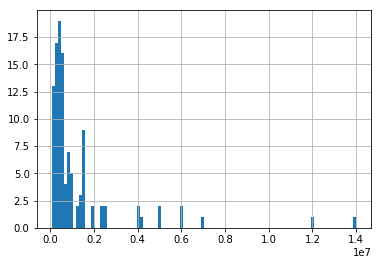

In [22]:
sample['lot_EstimateLow'].hist(bins=100)

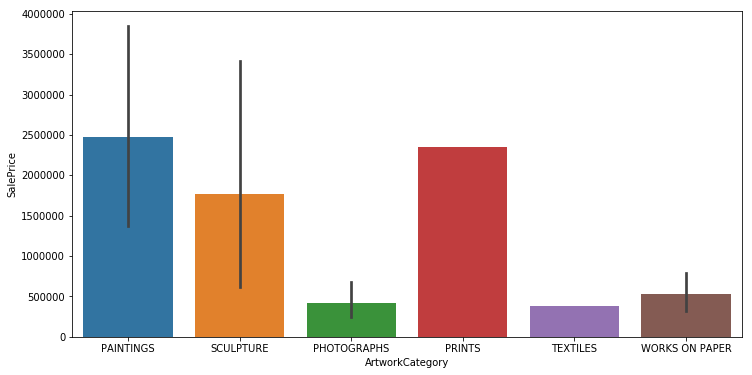

In [26]:
plt.figure(figsize=(12,6))       #bargraphs , figsize is used for constructing lenght and braedth of the bar graph
sb.barplot(sample['ArtworkCategory'],sample['SalePrice'])

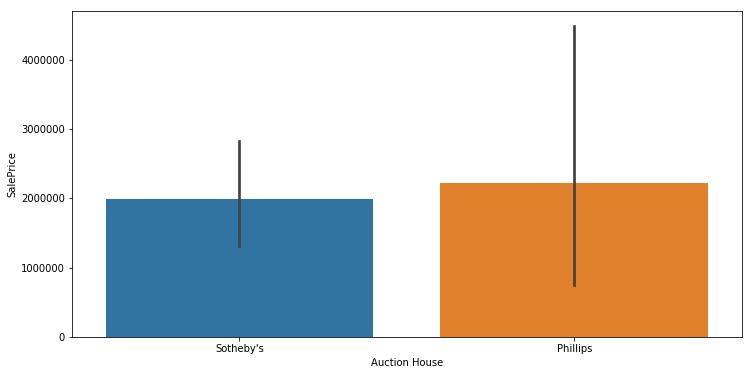

In [32]:
plt.figure(figsize=(12,6))
sb.barplot(sample['Auction House'],sample['SalePrice'])

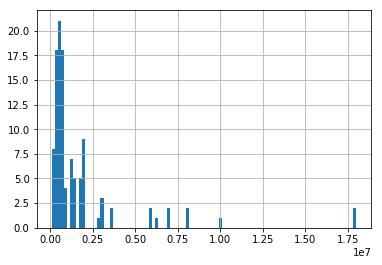

In [33]:
sample['lot_EstimateHigh'].hist(bins=100)

In [34]:
corr=sample.corr()
#correlations

In [35]:
corr

,RecID,AuctionID,lot LotNo,artwork ID,lot_EstimateHigh,lot_EstimateLow,SalePrice
RecID,1.000000,0.861797,0.224667,0.881812,-0.176966,-0.184784,-0.065258
AuctionID,0.861797,1.000000,-0.166028,0.999164,-0.084286,-0.092559,0.024051
lot LotNo,0.224667,-0.166028,1.000000,-0.136254,-0.266605,-0.265899,-0.235113
artwork ID,0.881812,0.999164,-0.136254,1.000000,-0.092623,-0.100945,0.017196
lot_EstimateHigh,-0.176966,-0.084286,-0.266605,-0.092623,1.000000,0.996993,0.889669
lot_EstimateLow,-0.184784,-0.092559,-0.265899,-0.100945,0.996993,1.000000,0.860869
SalePrice,-0.065258,0.024051,-0.235113,0.017196,0.889669,0.860869,1.000000


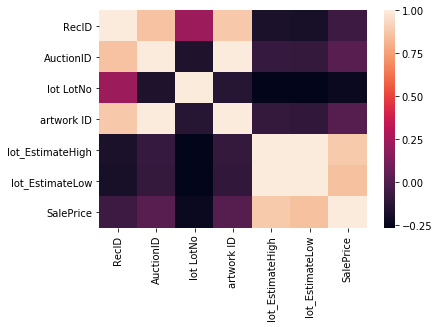

In [36]:
sb.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)   #heatmap